In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import seaborn as sns
import calendar
import folium
from folium.plugins import MarkerCluster


%matplotlib inline
em = pd.read_csv('C:\\Users\\Chirantan\\Desktop\\setup\\911_Calls_for_Service.csv')
em.head()

,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,07/13/2015 10:41:00 AM,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)"
1,07/13/2015 10:47:00 AM,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)"
2,07/13/2015 10:42:00 AM,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)"
3,07/13/2015 10:45:00 AM,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)"
4,07/13/2015 10:46:00 AM,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)"


In [2]:
def splitDatetime(data) :

   datatime = pd.DatetimeIndex(data.callDateTime)  ## Splitting Date-Time column into year, month, day, hour
   data['year'] = datatime.year
   data['month'] = datatime.month
   data['day'] = datatime.day
   data['hour'] = datatime.hour
   return data

splitDatetime(em)


,callDateTime,priority,district,description,callNumber,incidentLocation,location,year,month,day,hour
0,07/13/2015 10:41:00 AM,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)",2015,7,13,10
1,07/13/2015 10:47:00 AM,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)",2015,7,13,10
2,07/13/2015 10:42:00 AM,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)",2015,7,13,10
3,07/13/2015 10:45:00 AM,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)",2015,7,13,10
4,07/13/2015 10:46:00 AM,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)",2015,7,13,10
5,07/13/2015 10:47:00 AM,Medium,ND,FAMILY DISTURB,P151941007,2700 N CALVERT ST,"(39.3208510,-76.6147390)",2015,7,13,10
6,07/13/2015 10:46:00 AM,High,WD,SILENT ALARM,P151941008,2100 W NORTH AV,"(39.3097096,-76.6513109)",2015,7,13,10
7,07/13/2015 10:49:00 AM,Low,SW,AUTO ACCIDENT,P151941010,3100 WILKENS AV,"(39.2756929,-76.6664179)",2015,7,13,10
8,07/13/2015 10:48:00 AM,Medium,NE,FAMILY DISTURB,P151941011,4800 GILRAY DR,"(39.3483090,-76.5768440)",2015,7,13,10
9,07/13/2015 10:49:00 AM,Medium,ND,NARCOTICSOutside,P151941012,W GARRISON AV/PIMLICO RD,"(39.349653,-76.669145)",2015,7,13,10


In [3]:
k= em.hour[em.hour>12]
k

74         18
91         13
92         13
93         13
94         13
95         13
96         13
97         13
98         13
99         13
100        13
101        13
102        13
103        13
104        13
105        13
106        13
212        19
213        19
214        19
215        19
216        19
217        19
218        19
219        19
220        19
221        19
222        19
223        19
224        19
           ..
2210716    23
2210717    23
2210718    23
2210719    23
2210720    23
2210721    23
2210722    23
2210723    23
2210724    23
2210725    23
2210761    23
2210762    23
2210763    23
2210764    23
2210765    23
2210766    23
2210767    23
2210768    23
2210769    23
2210770    23
2210771    23
2210772    23
2210773    23
2210774    23
2210775    23
2210776    23
2210777    23
2210778    23
2210779    23
2210780    23
Name: hour, dtype: int32

In [29]:
m = pd.DataFrame(em.location.str.strip('()').str.split(',',1).tolist(), columns = ['lat','long'])
em['lat']= m.lat
em['lon']= m.long
lats= em[em['priority']=='Emergency']['lat']
lons = em[em['priority']=='Emergency']['lon']
j = pd.to_numeric(lats)
k = pd.to_numeric(lons)
la= j[j!=0]
lo= k[k!=0]
lati= la.dropna()
longi = lo.dropna()
locations= list(zip(lati,longi))



In [5]:
mapit = folium.Map(location=[39.4337959,-76.6763150])
popups = ['{}'.format(loc) for loc in locations]
mapit.add_children(MarkerCluster(locations=locations, popups=popups))
folium.PolyLine(locations, color="red", weight=2.5, opacity=1).add_to(mapit)
mapit                                                                             ## Only Priority type-'Emergency' shown on map                                                          

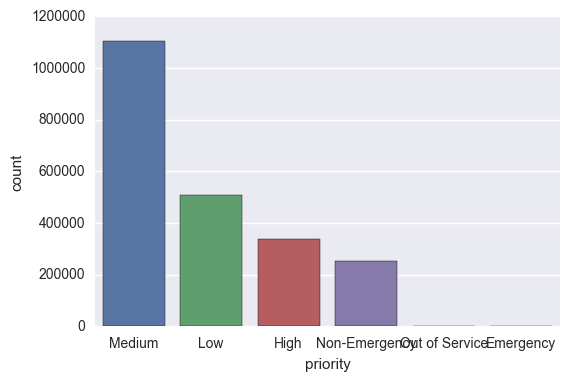

In [8]:
sns.countplot(em.priority)

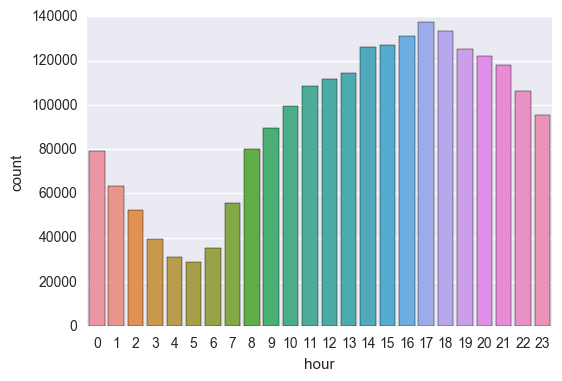

In [9]:
sns.countplot(em.hour)

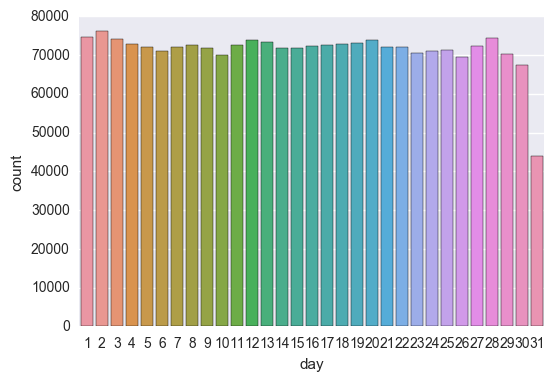

In [11]:
sns.countplot(em.day)

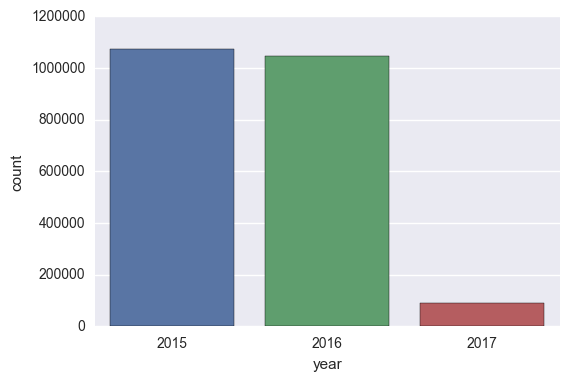

In [12]:
sns.countplot(em.year)

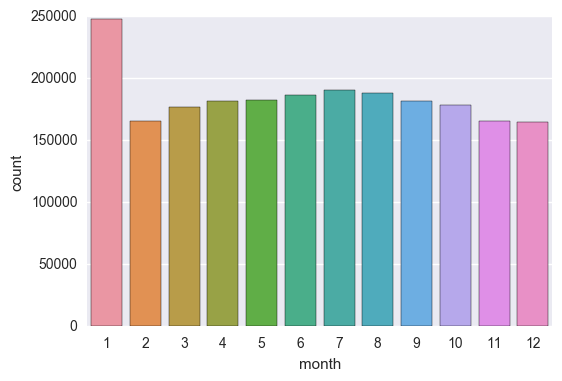

In [13]:
sns.countplot(em.month)

It seems that the month of January have most of the emergencies. Now let's explore more

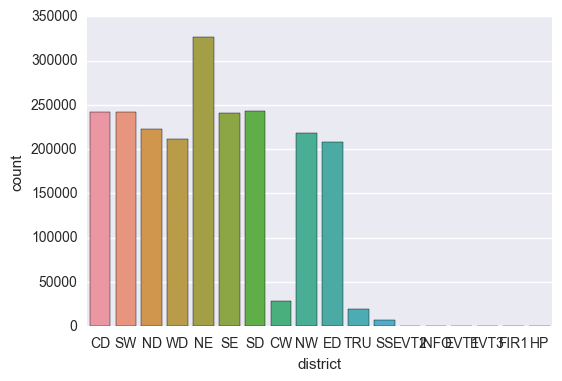

In [16]:
sns.countplot(em.district)

In [18]:
em.description.unique()

array(['SEE TEXT', '911/NO  VOICE', 'PRKG COMPLAINT', ...,
       'GET BEOLNGINGS', 'ICY CONDITIONS', 'DEPRESSED'], dtype=object)

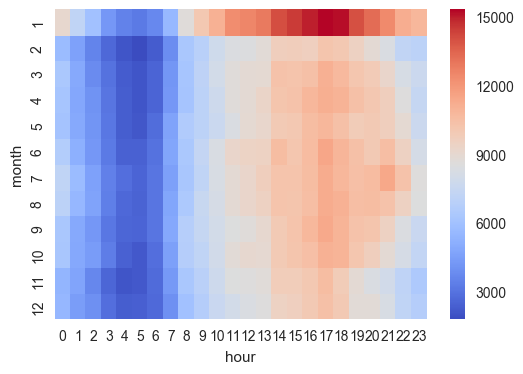

In [7]:
dayhour = em.groupby(by=['month','hour']).count()['priority'].unstack()
sns.heatmap(dayhour,cmap='coolwarm')
plt.figure(figsize=(12,6))

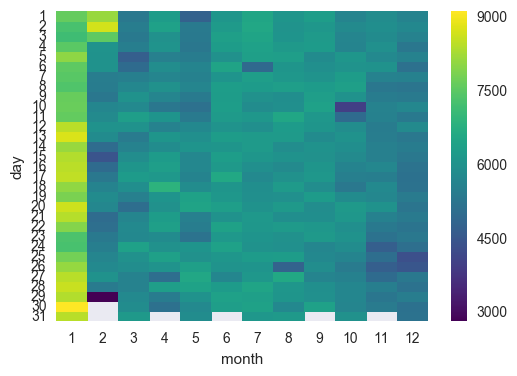

In [9]:
dayhour = em.groupby(by=['day','month']).count()['priority'].unstack()
sns.heatmap(dayhour,cmap='viridis')
plt.figure(figsize=(12,6))

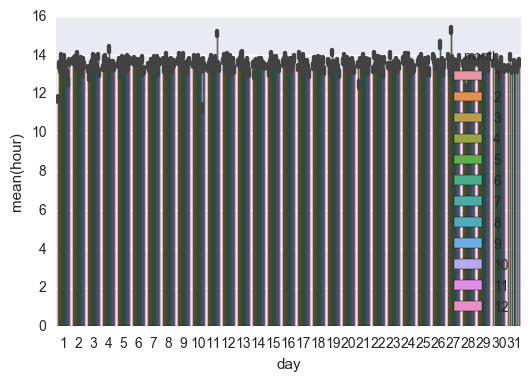

In [10]:
sns.barplot(x="day", y="hour", hue="month", data=em)

In [6]:
import bokeh.plotting as bp
from bokeh.models.tiles import WMTSTileSource
from IPython.core.display import HTML, display


bp.output_notebook()

def base_plot(tools='pan,wheel_zoom,reset',webgl=False):
    p = bp.figure(tools=tools,
        plot_width=int(850), plot_height=int(500),
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, webgl=webgl)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    
    return p

Loading BokehJS ...

In [45]:
em.priority.unique()

array(['Medium', 'Low', 'High', 'Non-Emergency', nan, 'Out of Service',
       'Emergency'], dtype=object)

In [10]:
em["priority"] = em["priority"].astype('category')

In [23]:
m = pd.DataFrame(em.location.str.strip('()').str.split(',',1).tolist(), columns = ['lat','long'])
k= pd.to_numeric(m.lat)
g= pd.to_numeric(m.long)
k= k[k!=0]
k=k.dropna()
g= g[g!=0]
g= g.dropna()
k.describe()

count    2.131875e+06
mean     3.954805e+01
std      3.641327e+02
min     -7.661001e+01
25%      3.928886e+01
50%      3.930291e+01
75%      3.932647e+01
max      5.317070e+05
Name: lat, dtype: float64

In [24]:
em['lat']= k
em['lon']= g

In [28]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.bokeh_ext import InteractiveImage
background = "black"

USA = x_range,y_range = ((-76.610012,53.170705),(-11.810388,90.059905))
if background == "Emergency":
      color_key = {'Medium':'aqua', 'Low':'lime',  'High':'blue', 'Non-Emergency':'fuchsia', 'Out of Service':'yellow', 'Emergency':'red' }
else: color_key = {'Medium':'blue', 'Low':'green', 'High':'red', 'Non-Emergency':'orange',  'Out of Service':'saddlebrown', 'Emergency':'red'}

def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(em, 'lat', 'lon', ds.count_cat('priority'))
    img = tf.shade(agg, color_key=color_key, how='log')
    return tf.dynspread(img,threshold=0.75, max_px=8)

p = base_plot()

url="http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.png"
#url="http://tile.stamen.com/toner-background/{Z}/{X}/{Y}.png"
tile_renderer = p.add_tile(WMTSTileSource(url=url))
tile_renderer.alpha=1.0 if background == "Emergency" else 0.15

InteractiveImage(p, image_callback)

Bokeh Map has some issue so the map is not displaying. But we can see the points formed on the map according to the priority category.